#  Business Problem

We are going to work with the classical wine quality datasets <https://archive.ics.uci.edu/ml/datasets/Wine+Quality>.  

This dataset contains several variables on the chemical characteristics of different wine brands in the Minho region of Portugal. At the same time we have a variable "quality" which ranks 0-10 the quality of the wine (wine tasting by an enologist). 

The aim of the analysis is to identify a regression function that can predict the quality based on the chemical characteristics. So we can get a model that predicts the quality of the wine based on the chemical characteristics of it


Your analysis must include:

1. Load both data set: white-wine and red-whine, and join it (use concat) in a unique dataframe: df_wine. Answer all the follwing questions using the complete df_wine dataframe
2. Missing inputation (in case there exists missing values) 
3. Exploratory Data Analysis. Show correlation and main statistics of all the variables in the data set
4. Categorical variables binning (dummies) - in case you have categorical variables
5. Split in train and test (25%)
6. Use SQL to get the following statistics: the total number of bottles and average of alcohol grouped by the quality
7. Fit models to the train dataset. Models to use: linear  regression and random forest
8. Perfomance metrics to compute: MAE and relative MAE



*****

In [1]:
import pandas as pd
import numpy as np

In [2]:
import glob

ficheros = glob.glob('*.csv', recursive=True)

lista_dfs = []

for fichero in ficheros:
    df = pd.read_csv(fichero,sep=';',decimal='.')
    lista_dfs.append(df)

df = pd.concat(lista_dfs)

df.head()

,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,NaN,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6492 non-null   float64
 6   free_sulfur_dioxide   6492 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [4]:
df.isna().any()

color                   False
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides                True
free_sulfur_dioxide      True
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
# Missing imputation - Imputamos los nan values con su media

df.chlorides.fillna(df.chlorides.mean(),inplace=True)
df.free_sulfur_dioxide.fillna(df.free_sulfur_dioxide.mean(),inplace=True)

In [6]:
df.isna().any()

color                   False
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
# Sacar dummies de las columnas categóricas

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
codif = encoder.fit_transform(df[['color']])
df[encoder.get_feature_names()] = codif

df.drop(['color','x0_white'],axis=1,inplace=True)

In [8]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
x0_red                  float64
dtype: object

In [9]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,x0_red
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.297950,-0.282787,-0.329054,0.159212,-0.252700,0.299568,-0.093616,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377239,-0.352508,-0.414476,0.030868,0.261454,0.225984,-0.037188,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.039259,0.133036,0.195242,0.057748,-0.329808,0.056197,-0.010177,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128936,0.402738,0.495482,0.175741,-0.267320,-0.185927,-0.359699,-0.036980,-0.348821
chlorides,0.297950,0.377239,0.039259,-0.128936,1.000000,-0.194801,-0.279452,0.061630,0.044523,0.395408,-0.255885,-0.200214,0.512289
free_sulfur_dioxide,-0.282787,-0.352508,0.133036,0.402738,-0.194801,1.000000,0.720842,0.029622,-0.145840,-0.188133,-0.181445,0.055304,-0.471535
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279452,0.720842,1.000000,0.030990,-0.238413,-0.275727,-0.266783,-0.041385,-0.700357
density,0.159212,0.030868,0.057748,0.175741,0.061630,0.029622,0.030990,1.000000,-0.052710,0.062810,-0.080060,-0.029499,0.037252
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044523,-0.145840,-0.238413,-0.052710,1.000000,0.192123,0.121941,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395408,-0.188133,-0.275727,0.062810,0.192123,1.000000,-0.002711,0.038485,0.487218


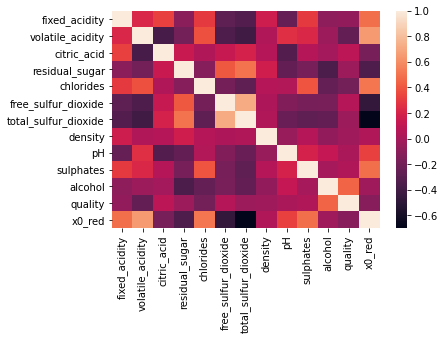

In [10]:
import seaborn as sns

sns.heatmap(df.corr());

In [11]:
y = df[['quality']]
X = df.drop('quality',axis=1)

In [12]:
y = y.values.ravel()

In [13]:
X.shape[1]

12

In [14]:
#Split in train and test (25%)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [15]:
X_train.shape[0]

4872

In [16]:
X_test.shape[0]

1625

**Use SQL to get the following statistics: the total number of bottles and average of alcohol grouped by the quality**

In [17]:
gr = df.groupby(by='quality',as_index=False)['alcohol'].agg(['count','mean'])
gr

,count,mean
quality,,
3,30,10.215000
4,216,10.180093
5,2138,9.835444
6,2836,10.585049
7,1079,11.380056
8,193,11.678756
9,5,12.180000


**Fit models to the train dataset. Models to use: linear regression lasso and random forest cv**

In [18]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=10,n_alphas=100)
lasso.fit(X_train,y_train)

y_pred_lasso = lasso.predict(X_test)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
tuned_parameters = [
    {'min_samples_split':[100,500],
     'n_estimators':[10,50,100]}
]

rfcv = GridSearchCV(rf,tuned_parameters)
rfcv.fit(X_train,y_train)
y_pred_rf = rfcv.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE_lasso = mean_absolute_error(y_pred = y_pred_lasso,y_true = y_test)
print(" ")
print("------------- LASSO Regression -----------------")
print("MAE: ", MAE_lasso)
print("Relative MAE (LASSO): ", 100*round(MAE_lasso/y_test.mean(),2) )
print("R2 (LASSO): ", r2_score(y_pred = y_pred_lasso, y_true = y_test) )

 
------------- LASSO Regression -----------------
MAE:  0.565199379190074
Relative MAE (LASSO):  10.0
R2 (LASSO):  0.29427819431687574


In [32]:
MAE_rf = mean_absolute_error(y_pred = y_pred_rf,y_true = y_test)
print(" ")
print("------------- RANDOM FOREST CV -----------------")
print("MAE: ", MAE_rf)
print("Relative MAE (Random Forest): ", 100*round(MAE_rf/y_test.mean(),2) )
print("R2 (Random Forest): ", r2_score(y_pred = y_pred_rf, y_true = y_test) )

 
------------- RANDOM FOREST CV -----------------
MAE:  0.5289181758279706
Relative MAE (Random Forest):  9.0
R2 (Random Forest):  0.3800515487504096
